In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.decomposition import PCA
import gensim

C:\Users\soul_\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [2]:
pca = PCA(n_components=2)

In [3]:
member = pd.read_json('./Data/member.json')
wor2vec_model = gensim.models.Word2Vec.load('./Datamining/word2vecmodel')

In [4]:
member_vec = {}
vector = []

In [5]:
for row in member.iterrows():
    name = row[1]['name']
    
    try :
        v = wor2vec_model.wv[name]
    except :
        continue
    
    vector.append(v)
    member_vec.setdefault(name,0)

In [6]:
pca.fit(vector)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
for name in member_vec.keys():
    member_vec[name] = pca.transform(wor2vec_model.wv[name])

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [13]:
X=[]
Y=[]
Name=[]

In [14]:
for name in member_vec.keys():
    X.append(member_vec[name][0][0])
    Y.append(member_vec[name][0][1])
    Name.append(name)

In [ ]:
font_name = mpl.font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
mpl.rc('font', family=font_name)

In [15]:
fig, ax = plt.subplots()
ax.scatter(X, Y,s=30,)

for i, txt in enumerate(Name):
    ax.annotate(str(txt), (X[i],Y[i]))

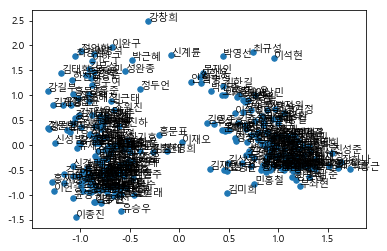

In [16]:
plt.show()